In [1]:
import mglearn
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

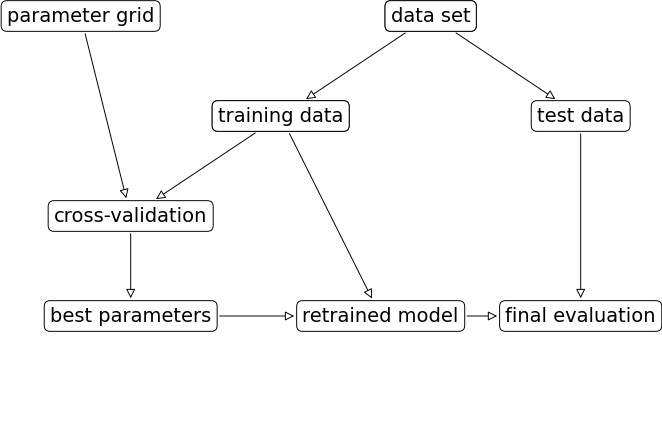

In [2]:
mglearn.plots.plot_grid_search_overview()

In [3]:
dat = pd.read_csv("/courses/EDS232/Data/demo-spotify.csv")

For GridSearchCV we need an instantiated model and parameter grid

The method considers product of the sets and evaluates each combination one by one.

The standard preparation:

In [4]:
# Define features and target
X = dat.drop(columns=['genre'])
y = dat['genre']

# Check for non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns

# Drop non-numeric columns
X = X.drop(columns=non_numeric_cols)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=808)

rf = RandomForestClassifier()

Now we will construct our parameter grid

In [5]:
param_grid = {
    "n_estimators": [10, 50, 100, 200], # trees
    "max_depth": [5, 10, 20, None], # levels of trees
    "max_features": ["sqrt", 9, None] # m_try number of features tried at each partition
}

# number of models = 4*4*3 = 48
gs = GridSearchCV(rf, param_grid = param_grid, n_jobs = -1, return_train_score = True)

The GridSearchCV object above behaves like a classifier. We can call fit, predict or score on it.

In [6]:
# Carry out the search 

gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, None],
                         'max_features': ['sqrt', 9, None],
                         'n_estimators': [10, 50, 100, 200]},
             return_train_score=True)

In [7]:
# Get the best hyperparameter values

gs.best_params_

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}

It is often helpful to visualize results of all cross-validation experiments.
You can access this information using cv_results_ attribute of a fitted GridSearchCV object.

In [8]:
results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.812887,0.142076,0.041468,0.015462,5,sqrt,10,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.869715,0.879781,...,0.873612,0.004388,48,0.884151,0.888393,0.880196,0.882361,0.881930,0.883406,0.002793
1,3.127397,0.386683,0.064500,0.021059,5,sqrt,50,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.883808,0.881507,...,0.880400,0.002512,45,0.892492,0.887674,0.889760,0.891565,0.890703,0.890439,0.001653
2,6.181790,0.157041,0.137131,0.025491,5,sqrt,100,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.881219,0.883520,...,0.881839,0.001648,44,0.888609,0.888034,0.891630,0.888833,0.890559,0.889533,0.001344
3,12.329265,0.611420,0.258491,0.042475,5,sqrt,200,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.880932,0.886972,...,0.882759,0.003273,40,0.890407,0.892061,0.888969,0.889840,0.890559,0.890367,0.001014
4,1.342684,0.279106,0.043546,0.018838,5,9,10,"{'max_depth': 5, 'max_features': 9, 'n_estimat...",0.878631,0.882945,...,0.880055,0.003166,46,0.889832,0.890910,0.890119,0.889336,0.889552,0.889950,0.000548
5,6.820904,0.310531,0.084263,0.011513,5,9,50,"{'max_depth': 5, 'max_features': 9, 'n_estimat...",0.882945,0.884383,...,0.883967,0.002534,39,0.894290,0.895513,0.893787,0.894657,0.890774,0.893804,0.001616
6,12.210428,0.795805,0.127284,0.024051,5,9,100,"{'max_depth': 5, 'max_features': 9, 'n_estimat...",0.882370,0.885821,...,0.884945,0.003412,38,0.893715,0.896807,0.892636,0.893794,0.894585,0.894308,0.001395
7,23.022567,1.572714,0.214125,0.065143,5,9,200,"{'max_depth': 5, 'max_features': 9, 'n_estimat...",0.882945,0.886396,...,0.885578,0.003225,37,0.893212,0.896663,0.895081,0.893794,0.895736,0.894897,0.001258
8,2.643681,0.098143,0.041933,0.010938,5,None,10,"{'max_depth': 5, 'max_features': None, 'n_esti...",0.875467,0.876043,...,0.878617,0.002855,47,0.888753,0.893212,0.889688,0.892500,0.891997,0.891230,0.001711
9,11.122490,0.523546,0.074895,0.016034,5,None,50,"{'max_depth': 5, 'max_features': None, 'n_esti...",0.877193,0.875180,...,0.882184,0.006087,43,0.888681,0.891486,0.892708,0.892932,0.895880,0.892337,0.002329


Let's look at only the most relevant rows

In [9]:
# Select relevant columns
filtered_results = pd.DataFrame(gs.cv_results_)[
    [
        "mean_test_score",
        "param_n_estimators",   # Number of trees
        "param_max_depth",      # Max depth of trees
        "param_max_features",   # Feature selection per split
        "mean_fit_time",        # Time taken to fit the model
        "rank_test_score",      # Rank of the best score
    ]
].set_index("rank_test_score").sort_index().T

Other than searching for best hyperparameter values, GridSearchCV also fits a new model on the whole training set with the parameters that yielded the best results.
So we can conveniently call score on the test set with a fitted GridSearchCV object.

In [10]:
# Best score

# Get the test scores 


Why are best_score_ and the score above different?



Visualizing parameters as heat 

In [11]:
def display_heatmap(param_grid, model, X_train, y_train):
   
    grid_search = GridSearchCV(
        model, param_grid, cv=5, n_jobs=-1, return_train_score=True, scoring="accuracy"
    )
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Convert results to DataFrame
    results = pd.DataFrame(grid_search.cv_results_)

    # Extract parameter names dynamically
    param_x, param_y = list(param_grid.keys())

    # Reshape test scores into a 2D array for heatmap
    scores = results.pivot(index=f"param_{param_y}", columns=f"param_{param_x}", values="mean_test_score")

    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(scores, annot=True, fmt=".3f", cmap="coolwarm")
    plt.xlabel(param_x)
    plt.ylabel(param_y)
    plt.title(f"Grid Search Heatmap ({param_x} vs. {param_y})")
    plt.show()

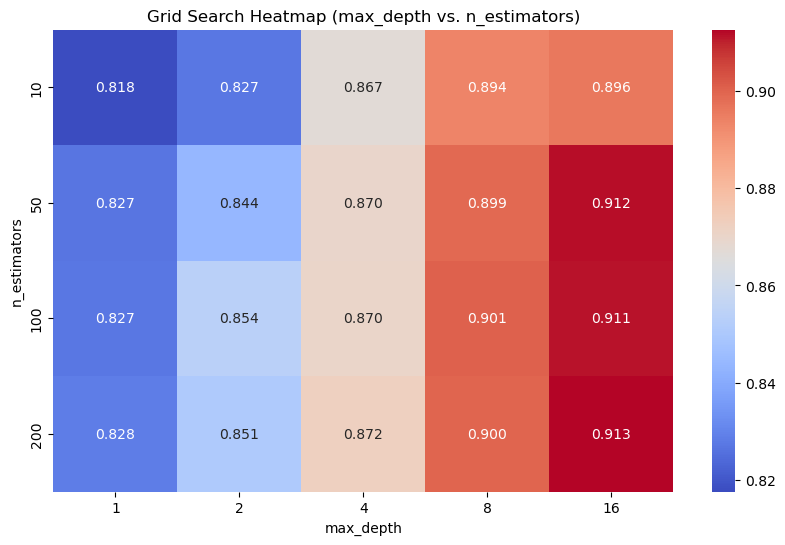

In [12]:
# Define the hyperparameter grid for max_depth vs. n_estimators
param_grid1 = {
    "max_depth": [1, 2, 4, 8, 16],
    "n_estimators": [10, 50, 100, 200]
}


# Call the function
display_heatmap(param_grid1, rf, X_train, y_train)

Better hyperparameter values: increase max_depth (looks promising to expand the search space to the "right").

A key problem with exhaustive grid search is the required number of models to evaluate grows exponentially with the dimensionally of the configuration space.

For future discussion:
sklearn.model_selection.RandomizedSearchCV
Samples configurations at random until certain budget (e.g., time) is exhausted.